<a href="https://colab.research.google.com/github/jcrbsa/Books-SystemJSF/blob/master/010Q_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/kevinruiz182/image_processing_tools

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
#Em processamento de imagens coloridas, faça a segmentação do bico da ave na imagem abaixo (pode ser obtida no github: https://github.com/kevinruiz182/image_processing_tools/tree/main/images/color_image_processing) usando as cores no espaço RGB: (R,G,B). Use a distância euclidiana (através da raiz quadrada da soma dos quadrados das diferenças de cada canal de cor respectivo) para determinar a diferença entre as cores dos pixels da imagem e o pixel amarelo, determinado por (255,255,0). Considere cada pixel como um vetor e o range de cada canal sendo de 0 a 255.  Seja a distância de limiar a mesma distância entre os pixels: (0,0,0) e (100,100,100).
#Qual a média dos valores de distância dos pixels, dentro dessa região de limiar, para a cor (255,255,0),  aproximadamente?

In [ ]:
distances

array([[18.57417562, 18.57417562, 18.57417562, ..., 16.76305461,
        13.92838828, 13.92838828],
       [18.57417562, 18.57417562, 22.93468988, ..., 19.20937271,
        19.20937271, 19.20937271],
       [22.93468988, 22.93468988, 22.93468988, ..., 17.1464282 ,
        19.20937271, 19.20937271],
       ...,
       [17.11724277, 17.80449381, 18.02775638, ..., 14.62873884,
        14.62873884, 18.02775638],
       [11.74734012, 17.80449381, 18.02775638, ..., 14.62873884,
        19.10497317, 14.62873884],
       [18.92088793, 18.60107524, 16.30950643, ..., 14.62873884,
        16.30950643, 16.30950643]])

899

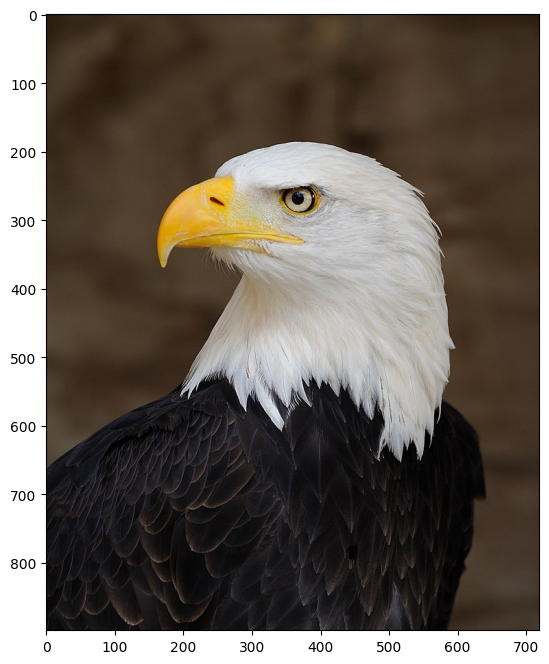

In [71]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
# Carregar a imagem
image_path = '/content/image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Definir a cor amarela como ponto de referência
yellow_color = np.array([255, 255, 0], dtype=np.uint8)

# Definir o limiar de distância
threshold_distance = np.sqrt(np.sum((np.array([0, 0, 0]) - np.array([100, 100, 100]))**2))

# Calcular a distância euclidiana para cada pixel em relação à cor amarela
distances = np.sqrt(np.sum((image - yellow_color)**2, axis=2))

segmented_image = np.zeros_like(image)
segmented_image[distances <= threshold_distance] = image[distances <= threshold_distance]
segmented_image = np.zeros_like(image)
for i, row in zip(range(distances.shape[0]), distances):
    for j, distance in zip(range(distances.shape[1]), row):
        if distance < threshold_distance:
          segmented_image[i][j] = image[i][j]


# Aplicar a segmentação baseada no limiar de distância

#segmented_image[distances  <= threshold_distance] = image[distances <= threshold_distance]
#segmented_image[distances < threshold_distance] = 255

# Calcular a média dos valores de distância dentro da região de limiar
mean_distance = np.mean(distances[distances <= threshold_distance])

plt.figure(figsize=(8, 8))
plt.imshow(segmented_image)

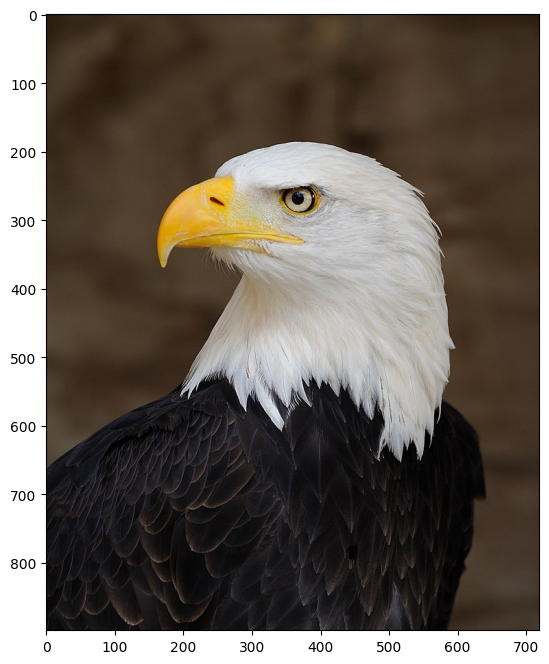

In [68]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definir a cor amarela como ponto de referência
yellow_color = np.array([255, 255, 0], dtype=np.uint8)

# Definir o limiar de distância
threshold_distance = np.sqrt(np.sum((np.array([0, 0, 0]) - np.array([100, 100, 100]))**2))

# Calcular a distância euclidiana para cada pixel em relação à cor amarela
distances = np.sqrt(np.sum((image - yellow_color)**2, axis=2))

# Aplicar a segmentação baseada no limiar de distância
segmented_image = np.zeros_like(image)
segmented_image[distances < threshold_distance] = image[distances < threshold_distance]

segmented_image[distances > threshold_distance] = 0

# Calcular a média dos valores de distância dentro da região de limiar
mean_distance = np.mean(distances[distances < threshold_distance])
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image)

In [67]:
mean_distance

18.024389490415867

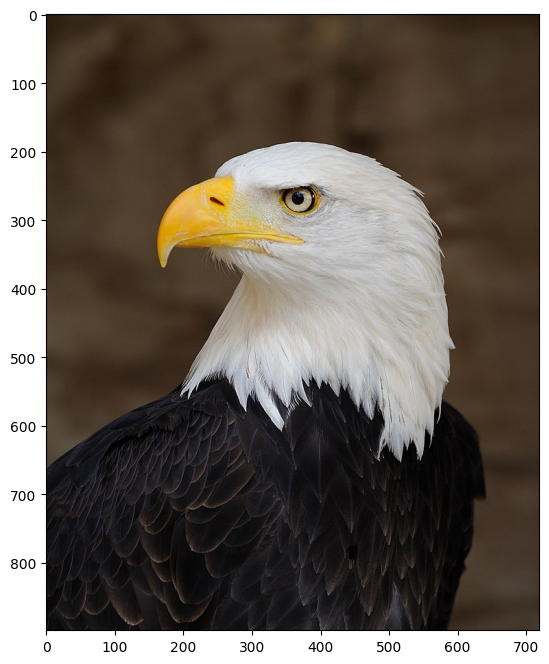

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image)

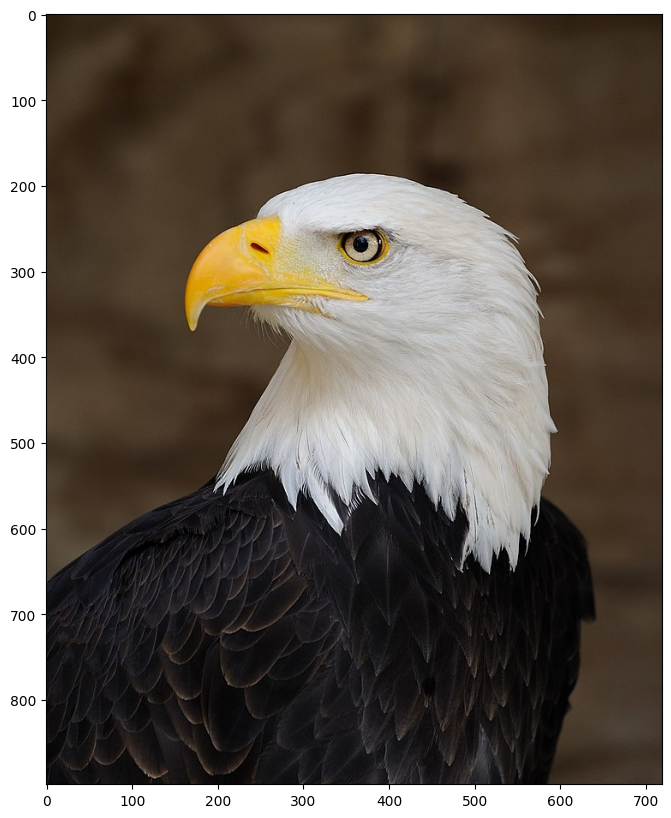

In [60]:
plt.figure(figsize=(15, 10))
plt.imshow(segmented_image)